In [35]:
from colors import cmap, heterocycles_colors
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import pandas as pd
from pathlib import Path
import numpy as np

# autoreload imports
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pd.read_csv(".temp/data/compas-2x.csv", index_col=0).query('charge == 0')
df = pd.read_csv(".temp/data/compas-2x.csv", index_col=0).query('charge == 0')

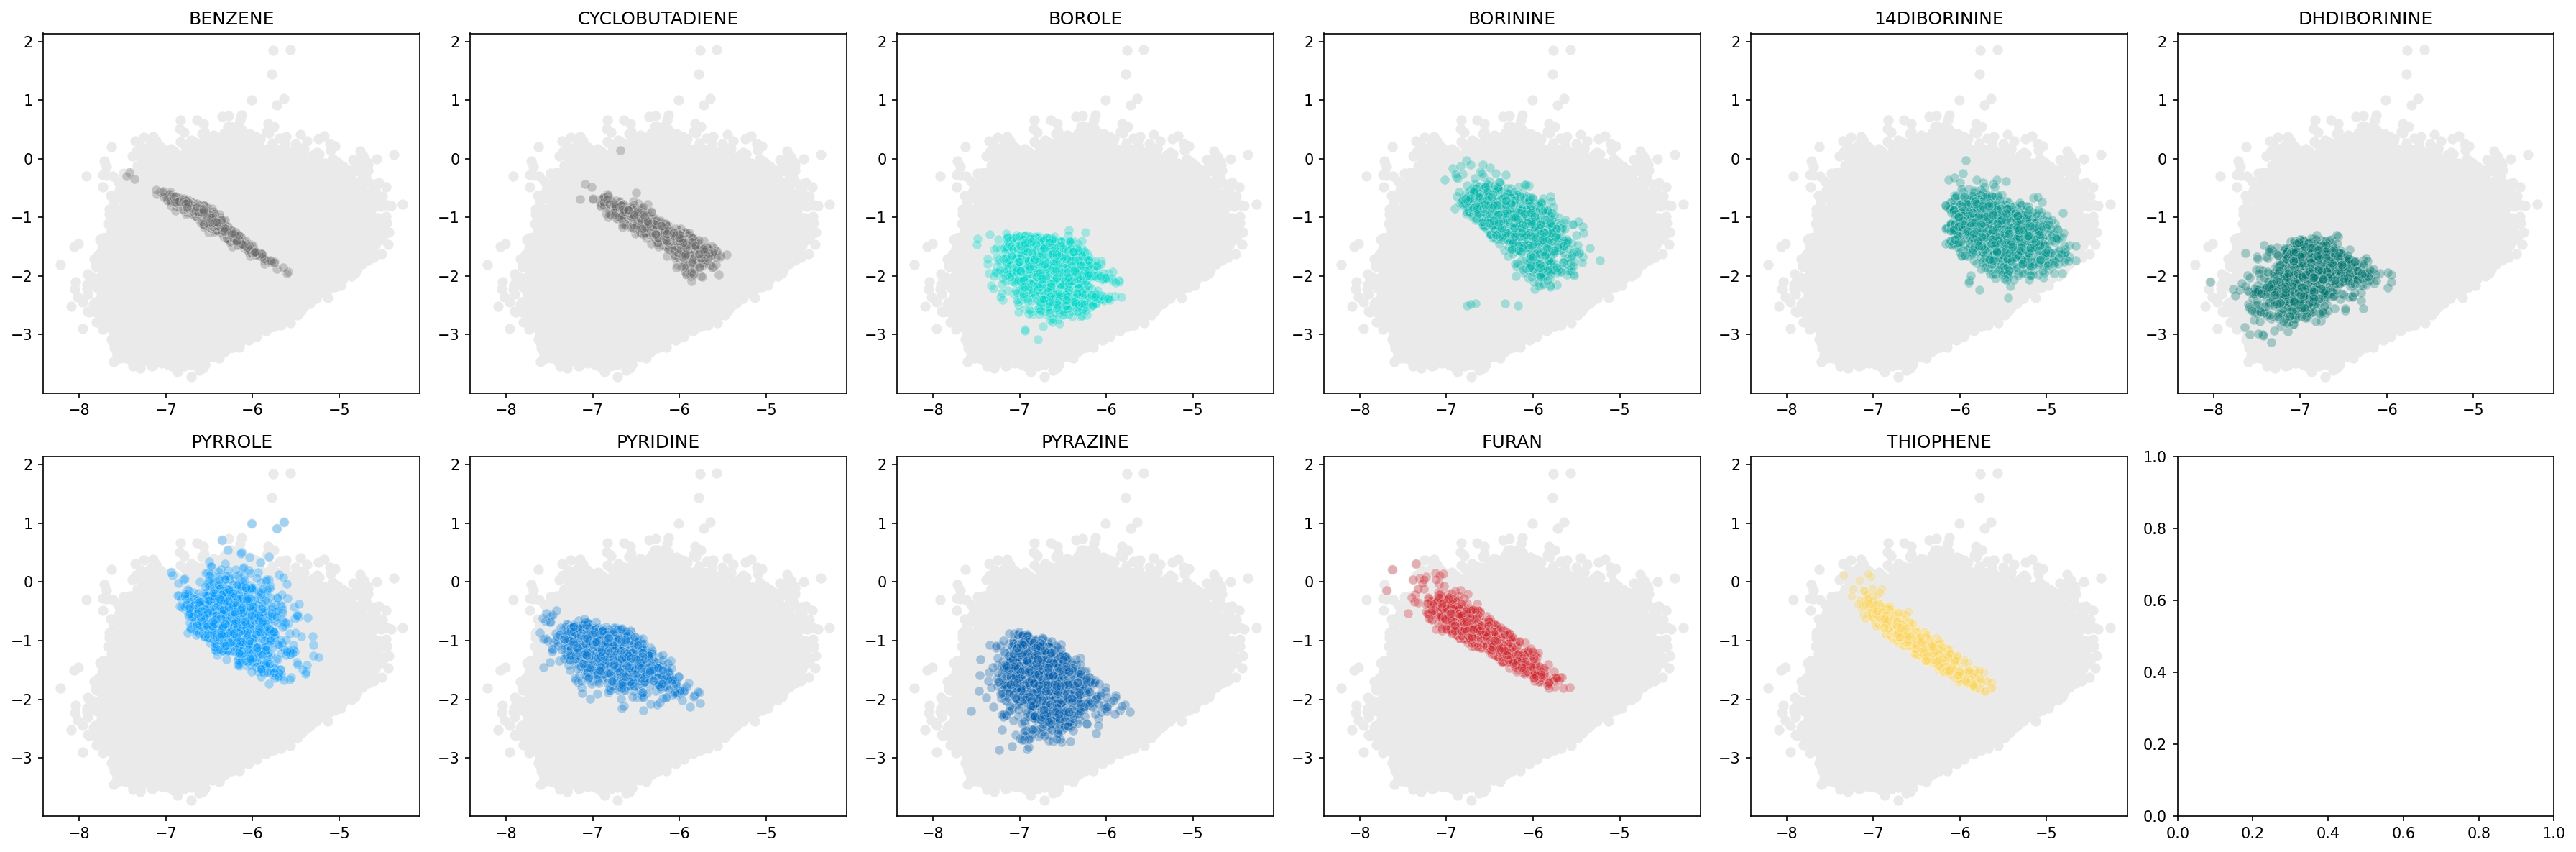

In [36]:
def get_query(bblock):
    query = "benzene != 0 "
    for ring in heterocycles_colors.keys():
        if ring == "benzene": continue
        if ring == bblock: 
            query += f"& `{ring}` != 0 "
            continue
        query += f"& `{ring}` == 0 "
    return query

# make a grid plot for each properties n_cols = 6, infer n_rows
n_cols = 6
n_rows = int(np.ceil(len(heterocycles_colors) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=150,)
axes = axes.flatten()

for i, (ring, color) in enumerate(heterocycles_colors.items()):
    sns.scatterplot(data=df,
                    x='homo_corr',y='lumo_corr',s=40,color="#EAEAEA",
                    edgecolor=None,
                    ax=axes[i])
    sns.scatterplot(data=df.query(get_query(ring)),
                    x='homo_corr',y='lumo_corr',s=40,color=color,
                    # edgecolor=None,
                    alpha=0.3,
                    ax=axes[i] )
    # remove axis 
    # axes[i].set_xlim([-8, -4])
    # axes[i].set_ylim([-4, 1])
    # show only three tickts
    # axes[i].set_xticks([-8, -6, -4]) 
    # axes[i].set_yticks([-4, -2, 0])
    #set title 
    axes[i].set_title(ring.upper())
    # show interger ticks
    axes[i].xaxis.set_major_locator(MaxNLocator(integer=True))    
    axes[i].yaxis.set_major_locator(MaxNLocator(integer=True))    
    # # set axis off
    # axes[i].set_axis_off()
    # hide labels
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()

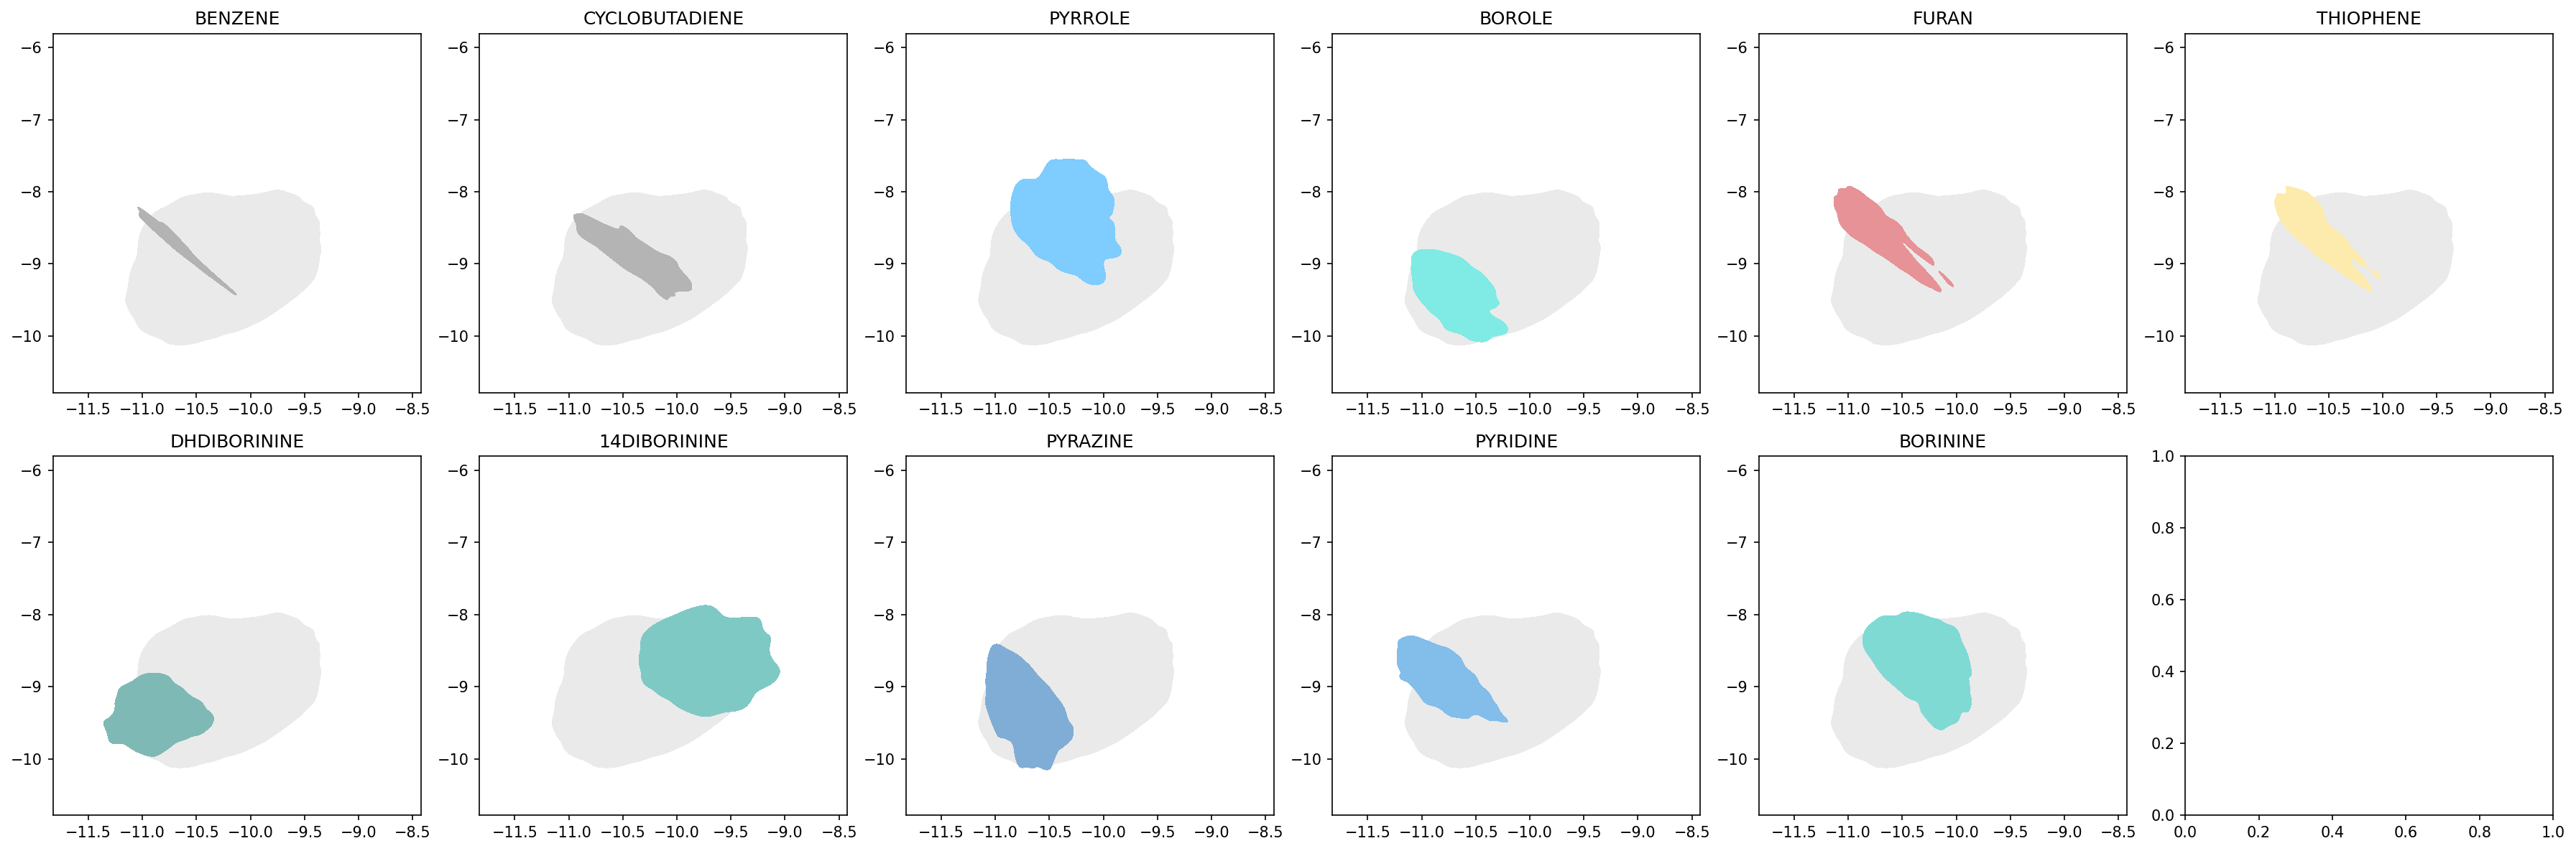

In [68]:
def get_query(bblock):
    query = "benzene != 0 "
    for ring in heterocycles_colors.keys():
        if ring == "benzene": continue
        if ring == bblock: 
            query += f"& `{ring}` != 0 "
            continue
        query += f"& `{ring}` == 0 "
    return query

# df = df.sample(100)
# make a grid plot for each properties n_cols = 6, infer n_rows
n_cols = 6
n_rows = int(np.ceil(len(heterocycles_colors) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(4 * n_cols, 4 * n_rows), dpi=150,)
axes = axes.flatten()

for i, (ring, color) in enumerate(heterocycles_colors.items()):
    colors = [
        [0, "#FFFFFF"], # 
        [1, "#D6D6D6"], # 
            ]

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    sns.kdeplot(data=df,x='homo',y='lumo', 
                cmap=cmap,
                levels=2, fill=True,ax=axes[i])
    colors = [
        [0, "#FFFFFF"], # 
        [1, color], # 
            ]

    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    sns.kdeplot(data=df.query(get_query(ring)),x='homo',y='lumo', cmap=cmap, levels=2, fill=True,ax=axes[i])
    axes[i].set_title(ring.upper())
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.tight_layout()